### Loading Utils

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("/n/home12/binxuwang/Github/mini_edm")
sys.path.append("/n/home12/binxuwang/Github/DiffusionReasoning")

In [3]:
import os
from os.path import join
import pickle as pkl
import torch
from easydict import EasyDict as edict
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import einops

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.dpi'] = 72
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.edgecolor'] = (1, 1, 1, 0)
plt.rcParams['figure.facecolor'] = (1, 1, 1, 0)
# vector graphics type
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [5]:
from train_edm import create_model, edm_sampler, EDM
from edm_utils import edm_sampler_inpaint, create_edm, get_default_config
from rule_utils import get_rule_img, get_obj_list, get_rule_list
from rule_utils import check_consistent
from dataset_utils import train_data2attr_tsr,load_raw_data,load_PGM_abstract

Checking rules of the final samples in the EDM

In [6]:
!ls /n/holylabs/LABS/kempner_fellows/Users/binxuwang/DL_Projects/mini_edm/exps/

base_cifar10_20240130-2317
base_cifar10_20240130-2318
base_gabor_prime_20240130-2251
base_gabor_sf_20240130-2306
base_mnist_20240129-1342
base_mnist_20240129-1406
base_mnist_20240130-2207
base_RAVEN10_20240131-2049
base_RAVEN10_abstract_20240201-0036
base_RAVEN10_abstract_onehot_20240201-0147
BigBlnrlrsm_RAVEN10_abstract_onehot_20240209-1411
BigBlnr_RAVEN10_abstract_20240208-1709
BigBlnr_RAVEN10_abstract_onehot_20240209-0208
Big_RAVEN10_abstract_20240207-1925
Big_RAVEN10_abstract_onehot_20240207-1925
WideBlnr_RAVEN10_abstract_20240211-1747
WideBlnr_RAVEN10_abstract_onehot_20240211-1743
Wide_RAVEN10_abstract_20240206-2323
Wide_RAVEN10_abstract_onehot_20240206-2324


In [11]:
from edm_utils import parse_train_logfile

In [21]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 100)

## Show Training Loss Dynamics

In [1]:
exproot = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/DL_Projects/mini_edm/exps/"
for expname in ["base_RAVEN10_abstract_20240201-0036",
                "base_RAVEN10_abstract_onehot_20240201-0147",
                "Base_RAVEN10_abstract_20240212-2139",
                "Base_RAVEN10_abstract_onehot_20240212-2140",
                "BaseBlnr_RAVEN10_abstract_20240212-2142",
                "BaseBlnr_RAVEN10_abstract_onehot_20240212-2143",
                "Wide_RAVEN10_abstract_20240206-2323",
                "Wide_RAVEN10_abstract_onehot_20240206-2324",
                "WideBlnr_RAVEN10_abstract_20240211-1747",
                "WideBlnr_RAVEN10_abstract_onehot_20240211-1743",
                # "Big_RAVEN10_abstract_20240207-1925",
                # "Big_RAVEN10_abstract_onehot_20240207-1925",
                "BigBlnr_RAVEN10_abstract_20240208-1709",
                # "BigBlnr_RAVEN10_abstract_onehot_20240209-0208",]:
                "BigBlnrlrsm_RAVEN10_abstract_onehot_20240209-1411",]:
    expdir = join(exproot, expname)
    df = parse_train_logfile(join(expdir, "std.log"))
    # df.tail()
    df.plot(x="step", y=["average_loss","batch_loss"], alpha=0.75) 
    plt.title(expname)
    plt.show()

NameError: name 'join' is not defined

### All obsolete

In [2]:
exproot = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/DL_Projects/mini_edm/exps/"
for expname in ["base_RAVEN10_abstract_20240201-0036",
                "base_RAVEN10_abstract_onehot_20240201-0147",
                "Base_RAVEN10_abstract_20240212-2139",
                "Base_RAVEN10_abstract_onehot_20240212-2140",
                "BaseBlnr_RAVEN10_abstract_20240212-2142",
                "BaseBlnr_RAVEN10_abstract_onehot_20240212-2143",
                "Wide_RAVEN10_abstract_20240206-2323",
                "Wide_RAVEN10_abstract_onehot_20240206-2324",
                "WideBlnr_RAVEN10_abstract_20240211-1747",
                "WideBlnr_RAVEN10_abstract_onehot_20240211-1743",
                "Big_RAVEN10_abstract_20240207-1925",
                "Big_RAVEN10_abstract_onehot_20240207-1925",
                "BigBlnr_RAVEN10_abstract_20240208-1709",
                "BigBlnr_RAVEN10_abstract_onehot_20240209-0208",
                "BigBlnrlrsm_RAVEN10_abstract_onehot_20240209-1411",]:
    expdir = join(exproot, expname)
    df = parse_train_logfile(join(expdir, "std.log"))
    # df.tail()
    df.plot(x="step", y=["average_loss","batch_loss"], alpha=0.75) 
    plt.title(expname)
    plt.show()

NameError: name 'join' is not defined

## Sample Rule Consistency

In [36]:
from stats_plot_utils import visualize_consistency, visualize_rule_validity

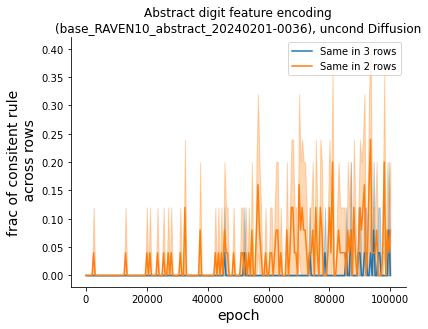

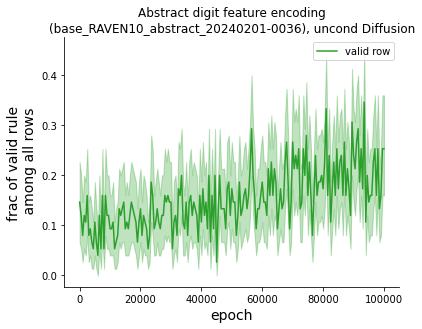

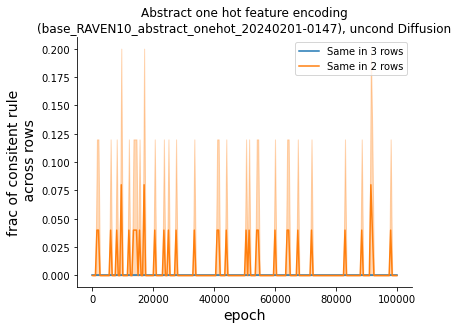

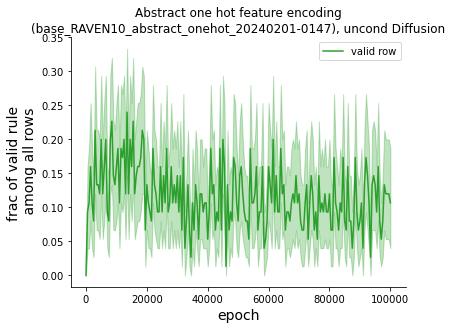

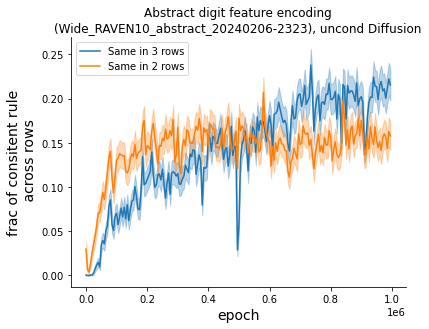

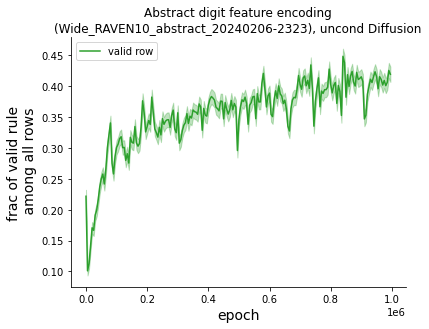

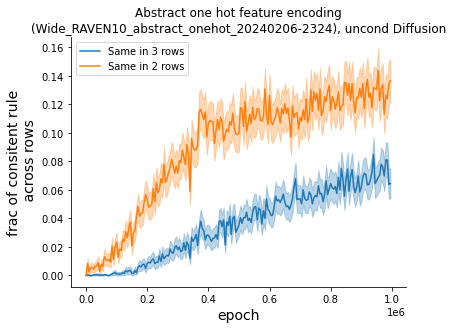

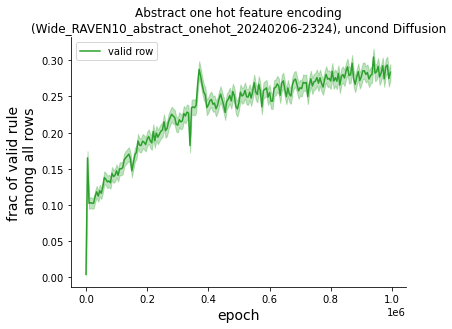

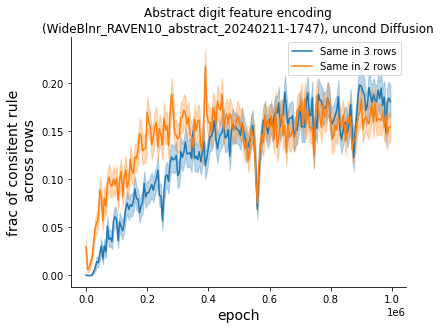

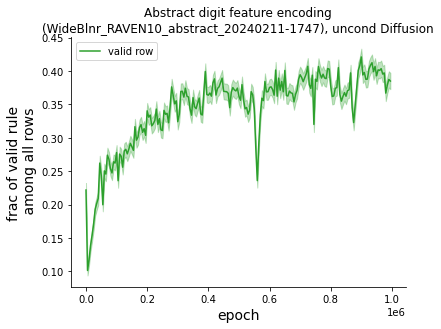

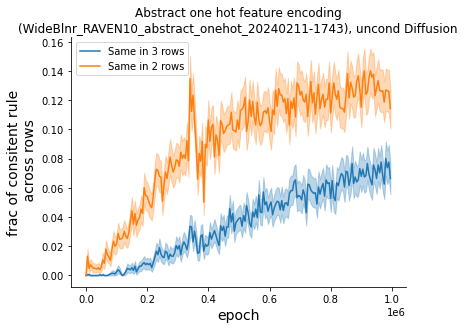

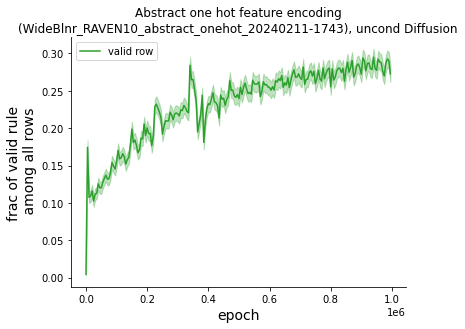

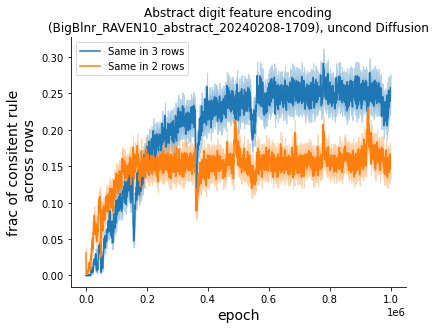

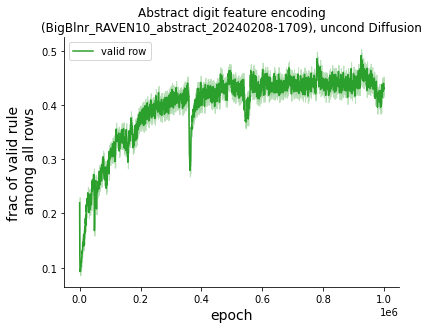

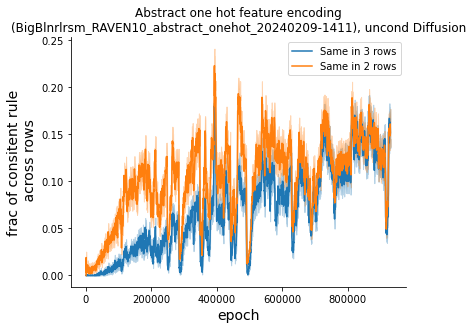

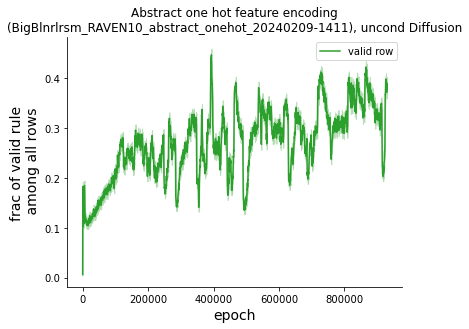

In [38]:
exproot = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/DL_Projects/mini_edm/exps/"
for expname in ["base_RAVEN10_abstract_20240201-0036",
                "base_RAVEN10_abstract_onehot_20240201-0147",
                "Base_RAVEN10_abstract_20240212-2139",
                "Base_RAVEN10_abstract_onehot_20240212-2140",
                "BaseBlnr_RAVEN10_abstract_20240212-2142",
                "BaseBlnr_RAVEN10_abstract_onehot_20240212-2143",
                "Wide_RAVEN10_abstract_20240206-2323",
                "Wide_RAVEN10_abstract_onehot_20240206-2324",
                "WideBlnr_RAVEN10_abstract_20240211-1747",
                "WideBlnr_RAVEN10_abstract_onehot_20240211-1743",
                # "Big_RAVEN10_abstract_20240207-1925",
                # "Big_RAVEN10_abstract_onehot_20240207-1925",
                "BigBlnr_RAVEN10_abstract_20240208-1709",
                # "BigBlnr_RAVEN10_abstract_onehot_20240209-0208",]:
                "BigBlnrlrsm_RAVEN10_abstract_onehot_20240209-1411",]:
    expdir = join(exproot, expname)
    data = np.load(join(expdir, "samples_inferred_rule_consistency.npz"))
    consistent_mat = data["consistent_mat"]
    rules_all = data["rules_all"]
    epoch_list = data["epoch_list"]
    is_onehot = "onehot" in expname
    encoding = 'one hot' if is_onehot else 'digit'
    # plt.imshow(consistent_mat)
    visualize_consistency(epoch_list, consistent_mat, 
                      title_str=f"Abstract {encoding} feature encoding\n({expname})", 
                      savefig=False,)
                      # figname="RAVEN10_abstract_onehot_base",)
    visualize_rule_validity(epoch_list, rules_all, 
                            title_str=f"Abstract {encoding} feature encoding\n({expname})", 
                            savefig=False,)
                            # figname="RAVEN10_abstract_onehot_base",);

## Summarizing Consistency Figure / Table 

In [47]:
df_col = []
for expname in ["base_RAVEN10_abstract_20240201-0036",
                "base_RAVEN10_abstract_onehot_20240201-0147",
                "Wide_RAVEN10_abstract_20240206-2323",
                "Wide_RAVEN10_abstract_onehot_20240206-2324",
                "WideBlnr_RAVEN10_abstract_20240211-1747",
                "WideBlnr_RAVEN10_abstract_onehot_20240211-1743",
                # "Big_RAVEN10_abstract_20240207-1925",
                # "Big_RAVEN10_abstract_onehot_20240207-1925",
                "BigBlnr_RAVEN10_abstract_20240208-1709",
                # "BigBlnr_RAVEN10_abstract_onehot_20240209-0208",]:
                "BigBlnrlrsm_RAVEN10_abstract_onehot_20240209-1411",]:
    expdir = join(exproot, expname)
    data = np.load(join(expdir, "samples_inferred_rule_consistency.npz"))
    consistent_mat = data["consistent_mat"]
    rules_all = data["rules_all"]
    epoch_list = data["epoch_list"]
    is_onehot = "onehot" in expname
    expname_prefix = expname.split("_")[0]
    encoding = 'onehot' if is_onehot else 'digit'
    df_col.append({"model_prefix":expname_prefix, "encoding":encoding,
                    "epoch":epoch_list[-1], 
                    "sample_num":consistent_mat.shape[1],
                    "3_same_rule":(consistent_mat[-1]==1).mean(), 
                    "2_same_rule":(consistent_mat[-1]==2).mean(), 
                    # "mismatch_rule":(consistent_mat[-1]==3).mean(), 
                    "valid_row":(rules_all[-1]!=-1).mean(),
                    })
df_syn = pd.DataFrame(df_col)

In [52]:
df_syn.pivot(index="model_prefix", columns="encoding", values=["3_same_rule","2_same_rule","valid_row"]) #,

3_same_rule           2_same_rule           valid_row          
encoding           digit    onehot       digit    onehot     digit    onehot
model_prefix                                                                
BigBlnr         0.257324       NaN    0.147949       NaN  0.430827       NaN
BigBlnrlrsm          NaN  0.150879         NaN  0.152344       NaN  0.378092
Wide            0.215332  0.064453    0.157715  0.136719  0.419108  0.283529
WideBlnr        0.180176  0.066406    0.154297  0.114258  0.384928  0.272949
base            0.000000  0.000000    0.080000  0.000000  0.253333  0.106667

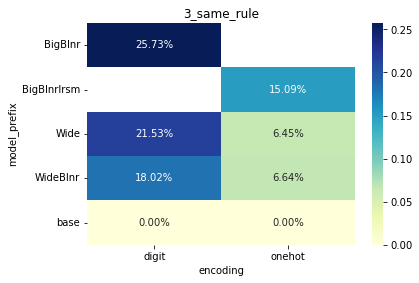

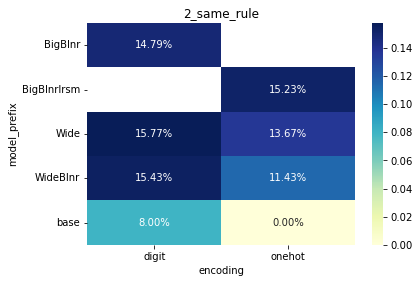

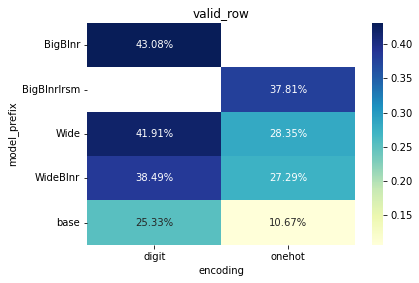

In [76]:
import seaborn as sns
# sns.set_theme(style="whitegrid")
for valkey in ["3_same_rule","2_same_rule","valid_row"]:
    sns.heatmap(df_syn.pivot(index="model_prefix", columns="encoding", 
                            values=valkey), 
                annot=True, cmap="YlGnBu", fmt=".2%")
    plt.title(valkey)
    # plt.axis('equal')
    plt.show()

## Are there any special rules that were learned preferably?

In [ ]:
rules_uniq, rules_cnt = np.unique(rules_all[-2], return_counts=True)

In [62]:
rules_cnt_mat = np.zeros((len(rules_all), 41), dtype=int)
for igen in range(len(rules_all)):
    rules_uniq, rules_cnt = np.unique(rules_all[igen], return_counts=True)
    assert min(rules_uniq) == -1
    rules_cnt_mat[igen, 1 + rules_uniq] = rules_cnt

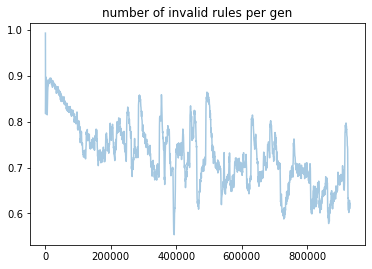

In [71]:
plt.plot(epoch_list, rules_cnt_mat[:, 0] / 2048 /3, alpha=0.4)
plt.title("proportion of invalid rules per gen")
plt.show()

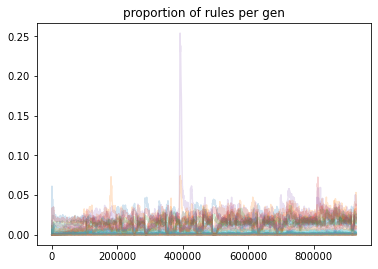

In [73]:
plt.plot(epoch_list,rules_cnt_mat[:, 1:] / 2048 /3, alpha=0.2)
plt.title("proportion of rules per gen")
plt.show()

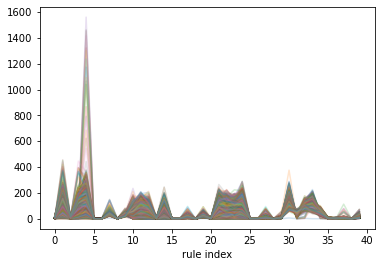

In [74]:
plt.plot(rules_cnt_mat[:, 1:].T, alpha=0.2)
plt.xlabel("rule index")
plt.show()

In [44]:
(rules_all[-1]!=-1).mean()

0.3780924479166667

In [46]:
(consistent_mat[-1]==1).mean()

0.15087890625

In [42]:
(consistent_mat[-1]==2).mean()

0.15234375